In [14]:
# Data Process 
# Generate data and generate html

In [211]:
import io
import re
import base64
import time 
import random
import warnings
import numpy as np
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from scipy.stats import pearsonr
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [212]:
df = pd.read_csv('/Users/chenzhuo/Desktop/data.csv', header= None)

# Evaluate time series 
# x = time.strftime('%Y-%m-%d: %M:%S', time.localtime(1347617370))

# print(x)

In [213]:
# Print the output of df.head()
print(df.head())
df.info()
df.describe()
# df.shape
# df.columns

               0            1       2
0  1583006871438     humidity   22.00
1  1583006871446  temperature   73.94
2  1583006871446          co2  759.00
3  1583006871447         tvoc   54.00
4  1583006874510     humidity   22.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623 entries, 0 to 3622
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3623 non-null   int64  
 1   1       3623 non-null   object 
 2   2       3597 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 85.0+ KB


,0,2
count,3.623000e+03,3597.000000
mean,1.583008e+12,280.176475
std,9.495210e+05,477.063929
min,1.583007e+12,0.000000
25%,1.583008e+12,20.000000
50%,1.583008e+12,73.220000
75%,1.583009e+12,409.000000
max,1.583010e+12,2763.000000


In [214]:
# Transfer the time to readable time 
time = df.iloc[:,0].astype('int64') ;
time = time.drop_duplicates();
print(time)
#time.reset_index(drop=True, inplace=True)
#time = time.unique();
#time = time.sort();


# time = datetime.datetime.fromtimestamp(timestamp)
# print(f"{time:%Y-%m-%d %H:%M:%S}")

0       1583006871438
1       1583006871446
3       1583006871447
4       1583006874510
5       1583006874518
            ...      
3616    1583010081049
3617    1583010081050
3619    1583010084113
3620    1583010084133
3621    1583010084134
Name: 0, Length: 2558, dtype: int64


In [215]:
df.count()

0    3623
1    3623
2    3597
dtype: int64

In [216]:
n = 3623
temperature = pd.DataFrame(np.zeros((n, 1)));
tvoc = pd.DataFrame(np.zeros((n, 1)));
CD = pd.DataFrame(np.zeros((n, 1)));
humidity = pd.DataFrame(np.zeros((n, 1)));
for i in range(0,3623):
    if df.iloc[i,1] == "temperature":
        temperature[i] = df.iloc[i,2];
    elif df.iloc[i,1] == "tvoc":
        tvoc[i] = df.iloc[i,2];
    elif df.iloc[i,1] == "humidity":
        humidity[i] = df.iloc[i,2];
    else:
        CD[i] = df.iloc[i,2]
                    
        
temperature = temperature.iloc[0];
temperature = temperature.iloc[1:];
temperature.dropna();
print(temperature.head())
tvoc = tvoc.iloc[0];
tvoc = tvoc.iloc[1:];
tvoc.dropna();
print(tvoc.head())
CD = CD.iloc[0];
CD = CD.iloc[1:];
CD.dropna();
print(CD.head())
humidity = humidity.iloc[0];
humidity = humidity.iloc[1:];
humidity.dropna();
print(humidity.head())

1     73.94
5     74.48
9     74.12
13    74.30
17    74.30
Name: 0, dtype: float64
3     54.0
7     50.0
11    47.0
15    46.0
19    42.0
Name: 0, dtype: float64
2     759.0
6     733.0
10    712.0
14    704.0
18    679.0
Name: 0, dtype: float64
4     22.0
8     22.0
12    23.0
16    22.0
20    22.0
Name: 0, dtype: float64


In [217]:
# Make a new data frame with cleaned data 
# df = pd.concat([temperature, tvoc, CD, humidity], ignore_index=True, sort=False)
# df = pd.concat([temperature, tvoc, CD, humidity],axis = 1)
print(df.head())
print(df)

               0            1       2
0  1583006871438     humidity   22.00
1  1583006871446  temperature   73.94
2  1583006871446          co2  759.00
3  1583006871447         tvoc   54.00
4  1583006874510     humidity   22.00
                  0            1       2
0     1583006871438     humidity   22.00
1     1583006871446  temperature   73.94
2     1583006871446          co2  759.00
3     1583006871447         tvoc   54.00
4     1583006874510     humidity   22.00
...             ...          ...     ...
3618  1583010081050         tvoc   19.00
3619  1583010084113     humidity   20.00
3620  1583010084133  temperature   70.88
3621  1583010084134          co2  527.00
3622  1583010084134         tvoc   19.00

[3623 rows x 3 columns]


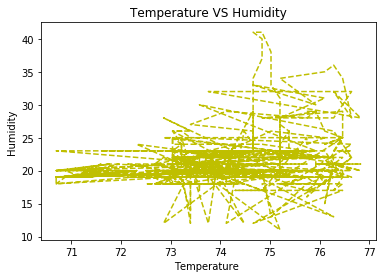

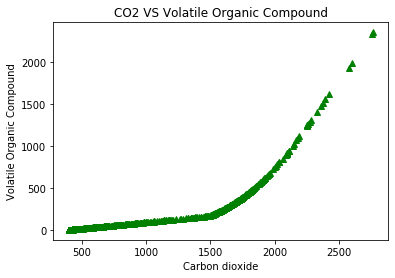

In [200]:
plt.plot(temperature,humidity, '--y')
         #time, CD, 'r', time, humidity, 'bs', time, tvoc, 'g^')
# legend(['temperature', 'Carbon Dioxide', 'Humidity', 'Water'])

plt.xlabel('Temperature ')
plt.ylabel('Humidity')
plt.title('Temperature VS Humidity')
plt.show()

plt.plot(CD, tvoc, 'g^')
plt.xlabel('Carbon dioxide')
plt.ylabel('Volatile Organic Compound')
plt.title('CO2 VS Volatile Organic Compound')
plt.show()

In [221]:
# Find if there are any 3D relationship between the environmental indexes 
# import matplotlib as mpl
# mpl.rcParams['legend.fontsize'] = 10
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot(CD,tvoc, temperature, label='parametric curve')
# ax.legend()
# plt.show()

# ax.plot(CD,tvoc, humidity, label='parametric curve')
# ax.legend()
# plt.show()

In [ ]:
# It can be viewed that Temperature has no strong relationship with humidity in this case 
# So the operator would dig into the relationship between carbon dioxide and volatile organic compund

In [ ]:
# This section is intended to save the image as html 
# But Alden has done the part 
# So skipped 
# tmpfile = BytesIO()
# fig.savefig('my_plot.png', format = 'png')
# encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

# plot_html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

# with open('test.html','w') as f:
#     f.write(plot_html)

In [ ]:
# An alternative method: 
# def fig_to_base64(fig)
#     img = io.BytesIO()
#     fig.savefig(img, format='png',
#                 bbox_inches='tight')
#     img.seek(0)

#     return base64.b64encode(img.getvalue())

# encoded = fig_to_base64(fig)
# my_html = '<img src="data:image/png;base64, {}">'.format(encoded.decode('utf-8'))

In [136]:
# Time series 
# Cleaning and tidying datetime data #
# Convert the date column to string: df_dropped['date']

# Convert the date_string Series to datetime: date_times
# date_times = time.to_datetime('time', format='%Y%m%d%H%M')
# import datetime as dt
# timestamps = time;
# lenTime = len(timestamps);
# timeSeries = [];
# for timestamp in timestamps:
#     value = dt.datetime.fromtimestamp(timestamp)
#     if value in timeSeries:
#         pass
#     else:
#         timeSeries.append(value)
        
print(timeSeries)
# Print the output of df_clean.head()
# print(date_times.head())

In [151]:
# Analyze the relationship between temperature and CO2
# Analyze the relationship between temperature and humidity 
# Analyze the relationship between temperature and VOC
n = len(temperature)
m = len(CD)
l = len(humidity)
k = len(tvoc)

print(n,m,l,k)
assert n== l
assert m== k

959 852 959 852


In [203]:
# # Convert value to list 
# temp_list = temperature.values.tolist();
# CD_list = CD.values.tolist();
# humidity = humidity.values.tolist();
# tvoc = tvoc.values.tolist()

In [182]:
# Stackeed graph 
# But how?
# tempMed = temperature.median()
tempMean = np.mean(temperature)
tempstd = np.std(temperature)
tempMed = np.median(temperature)
CDMean = np.mean(CD)
CDstd = np.std(CD)
CDMed = np.median(CD)
humiMean = np.mean(humidity)
humistd = np.std(humidity)
humiMed = np.median(humidity)
tvocMean = np.mean(tvoc)
tvocstd = np.std(tvoc)
tvocMed = np.median(tvoc)
print("The mean, standard deviation and median of temperature are: {},{},{} ".format(tempMean, tempstd,tempMed))
print("The mean, standard deviation and median of carbon dioxide are: {},{},{} ".format(CDMean, CDstd,CDMed))
print("The mean, standard deviation and median of tVOC are: {},{},{} ".format(tvocMean, tvocstd,tvocMed))
print("The mean, standard deviation and median of humidity are: {},{},{} ".format(humiMean, humistd,humiMed))

The mean, standard deviation and median of temperature are: 73.86446088794926,1.4259509549240046,nan 
The mean, standard deviation and median of carbon dioxide are: 925.9424882629108,572.6479452749406,614.0 
The mean, standard deviation and median of tVOC are: 152.0011737089202,277.5702402303482,32.0 
The mean, standard deviation and median of humidity are: nan,nan,nan 


In [202]:
# Covariance and Pearson 

# cov_mat = np.stack((temperature, humidity), axis = 1)  
# print("shape of matrix temperature and humidity:", np.shape(cov_mat)) 
# print("shape of covariance matrix of temperature and humidity:", np.shape(np.cov(cov_mat)))   
# print(np.cov(cov_mat)) 
# corr1, _ = pearsonr(temperature, humidity)
# print('The Pearsons correlation of temperature and humidity is: %.3f' % corr1)


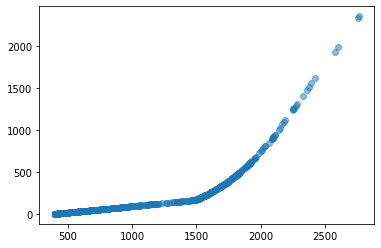

In [222]:
# Deploy models to make predictions 

train_size = round(int(0.75 * m))
test_size = m - train_size 
x = CD;
y = tvoc;
plt.scatter(x, y, alpha = 0.5)
plt.show()

[[ 992.81600182 2306.57130717]
 [ 648.20582069 1253.95331423]
 [2237.70062724 2070.8131383 ]]


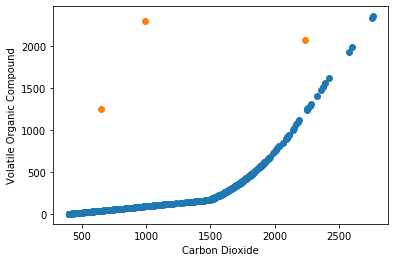

In [224]:
# Centroid Clustering
# Number of clusters
k = 3
# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), k)
# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), k)
# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids)
# Make a scatter plot of x, y
plt.scatter(x,y)
# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

plt.xlabel('Carbon Dioxide')
plt.ylabel('Volatile Organic Compound')
# Display plot
plt.show()

In [226]:
# Deploy Euclidean Disatance to determine if there is any relationship between x and y
CD_tvoc = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

# Distance formula
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one+two) ** 0.5
  return distance
# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(CD))
# Distances to each centroid
distances = np.zeros(k)
# Assign to the closest centroid
for i in range(len(CD)):
  distances[0] = distance(CD_tvoc[i], centroids[0])
  distances[1] = distance(CD_tvoc[i], centroids[1])
  distances[2] = distance(CD_tvoc[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster
# Print labels
print(labels)

[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 0. 0. 2.
 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [229]:
# Update the labels
import copy 
centroids_old = copy.deepcopy(centroids)

for i in range(k):
  points = [CD_tvoc[j] for j in range(len(CD_tvoc)) if labels[j] == i]
  centroids[i] = np.mean(points, axis = 0)
  
print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[1058.51032345  893.26119304]
 [2459.84776479 1521.48248104]
 [1635.68927478  151.23494845]]
- - - - - - - - - - - - - -
[[ 493.60165975   13.84232365]
 [2268.37931034 1285.75862069]
 [1422.8856305   250.86803519]]


In [ ]:
#Repeat calculating error until stablizing
error = np.zeros(3)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

while error.all() != 0:
  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

colors = ['r', 'g', 'b']
plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

In [ ]:
# Deploy KMeans 
from sklearn.cluster import KMeans
values = np.array(list(zip(x, y)))

centroids = np.array(list(zip(centroids_x, centroids_y)))

model = KMeans(init="k-means++", n_clusters=2)
# Initial centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)

results = model.fit_predict(values)

plt.scatter(x, y, c=results, alpha=1)

# Cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)

ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([0, 1, 2, 3, 4])

plt.title('K-Means++ Initialization')
plt.show()
print("The model's inertia is " + str(model.inertia_))

#Recap
#The KMeans() function has an init parameter, 
#Which specifies the method for initialization:
#'random' & 'K-Means++'

In [ ]:
# Up to now 
# We need more data to train the model 
# Still do not have clear conclusion on the relationship between carbon dioxide and volatile organic compound 
# But according the sample 
# There is linear relationship between the two indexes 
# So, we will move forward!